<a href="https://colab.research.google.com/github/kartik5465/deeplearning/blob/master/Implement_deep_learning_for_recognizing_classes_for_datasets_like_CIFAR_10_images_for_previously_unseen_images_and_assign_them_to_one_of_the_10_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

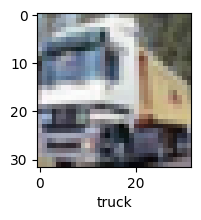

In [ ]:
plot_sample(X_train, y_train, 1)

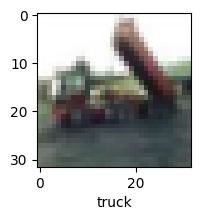

In [ ]:
plot_sample(X_train, y_train, 2)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 78s 49ms/step - loss: 1.8082 - accuracy: 0.3549
Epoch 2/5
1563/1563 [==============================] - 85s 54ms/step - loss: 1.6194 - accuracy: 0.4306
Epoch 3/5
1563/1563 [==============================] - 80s 51ms/step - loss: 1.5362 - accuracy: 0.4591
Epoch 4/5
1563/1563 [==============================] - 85s 54ms/step - loss: 1.4796 - accuracy: 0.4785
Epoch 5/5
1563/1563 [==============================] - 86s 55ms/step - loss: 1.4269 - accuracy: 0.4993


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 6s 17ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.56      0.55      1000
           1       0.65      0.59      0.62      1000
           2       0.43      0.24      0.31      1000
           3       0.34      0.42      0.38      1000
           4       0.39      0.47      0.43      1000
           5       0.48      0.23      0.31      1000
           6       0.45      0.66      0.54      1000
           7       0.57      0.53      0.55      1000
           8       0.54      0.71      0.62      1000
           9       0.59      0.52      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.4886 - accuracy: 0.4630
Epoch 2/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.1366 - accuracy: 0.6009
Epoch 3/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.0027 - accuracy: 0.6515
Epoch 4/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9258 - accuracy: 0.6778
Epoch 5/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8652 - accuracy: 0.7006
Epoch 6/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8152 - accuracy: 0.7166
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7685 - accuracy: 0.7338
Epoch 8/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.7280 - accuracy: 0.7473
Epoch 9/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6963 - accuracy: 0.7568
Epoch 10/10
1563/1563 [==============================] - 43s 28m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9187 - accuracy: 0.6970


[0.9187127947807312, 0.6970000267028809]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[5.51828835e-03, 9.10629111e-04, 2.13023019e-03, 6.78299665e-01,
        4.01207944e-03, 8.22020620e-02, 2.51311949e-03, 5.73437777e-04,
        2.23557726e-01, 2.82686291e-04],
       [3.46016348e-03, 9.21961740e-02, 3.70460771e-06, 5.75130770e-08,
        2.79198645e-07, 1.12136278e-09, 1.15195575e-09, 1.10498934e-08,
        9.04136300e-01, 2.03434145e-04],
       [1.09268595e-02, 4.69073839e-02, 2.48945085e-03, 2.21045013e-03,
        1.59546698e-03, 1.22418322e-04, 1.45718959e-05, 3.58397188e-03,
        9.29678559e-01, 2.47091078e-03],
       [8.97411406e-01, 5.75407110e-02, 2.21674889e-02, 5.81789900e-05,
        6.03269925e-03, 2.34209892e-06, 3.64501793e-05, 9.67733831e-06,
        1.65130664e-02, 2.27930970e-04],
       [2.41630983e-06, 2.02412011e-05, 8.86135921e-03, 4.45882753e-02,
        1.36221334e-01, 1.80929503e-03, 8.08378994e-01, 8.41133499e-07,
        1.17069532e-04, 1.56483338e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:

y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

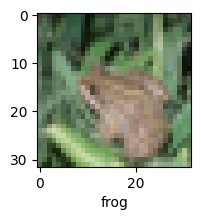

In [ ]:
plot_sample(X_test, y_test,4)

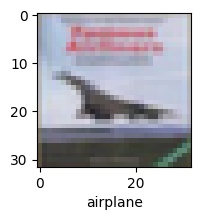

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[4]]

'frog'

In [ ]:
classes[y_classes[3]]

'airplane'